# Using Monte Carlo simulation to value options.

## Packages

In [1]:
import pandas as pd
import numpy as np
import datetime 
import scipy.stats as sts
import matplotlib.pyplot as plt
import math
import scipy.optimize
from scipy.stats import norm

## Question 1

In [2]:
data = pd.read_excel(r"C:\Users\user\Desktop\newDA3.xlsx")
dlog = data['log']
dprc = data['PRC']
dnormret = data['RETX']

In [3]:
# daily log return and volatility of the stock are provided below
meanlog = dlog.mean()
stdlog = np.std(dlog)
print(meanlog, stdlog)

0.0002973232251924456 0.023280305031596737


## Question 2 annual mean and std

In [4]:
#the anual log return and volatility of the stock are printed below
anlogmean = ((meanlog+1) ** 252)-1
print(anlogmean)
anstdlog = stdlog*math.sqrt(252)
print(anstdlog)

0.07779179786535328
0.36956338535598393


## Question 3 set up 

In [5]:
Szero = dprc.iloc[-1] # Get the last element of stock prices, 31.12.2021 price 
print(Szero)
# Defining risk free rates
annualrf = 0.03
dailyrf = annualrf/252

mc_sims = 10000 # number of simulations
T = 19 #timeframe in days

# Parameters
# drift coefficent
drift_rf = dailyrf
# number of steps
step = 19
# time in years just in case extra information
years = step/252
# number of sims
simulation_number = 10000
# initial stock price
S0 = Szero
# volatility
volatility = stdlog

415.01001


## Question 3 (GBM)

In [6]:
# calc each time step
dt = 1
# simulation using numpy arrays
random_gbm = np.random.normal(0, np.sqrt(dt), size=(simulation_number,step)).T
St = np.exp(
    (drift_rf - volatility ** 2 / 2) * dt
    + volatility * random_gbm
)
# include array of 1's
St = np.vstack([np.ones(simulation_number), St])
# multiply through by S0 and return the cumulative product of elements along a given simulation path (axis=0). 
St = S0 * St.cumprod(axis=0)

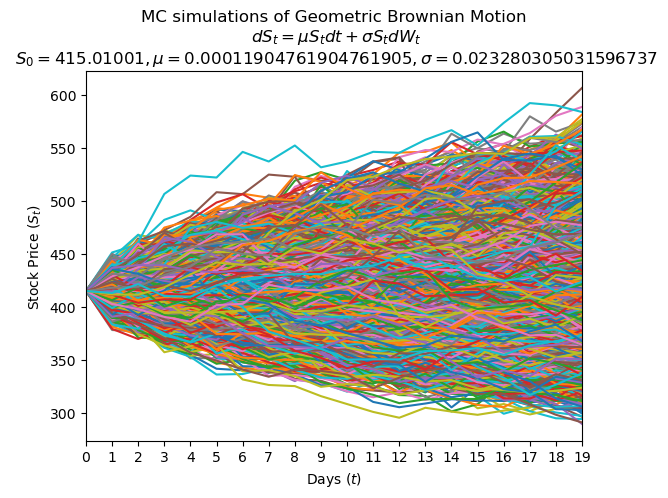

The Mean is 415.6299395353067


In [7]:
# Define time interval correctly 
time = np.linspace(0,T,step+1)
# Require numpy array that is the same shape as St
tt = np.full(shape=(simulation_number,step+1), fill_value=time).T
plt.plot(tt, St)
plt.xlabel("Days $(t)$")
plt.ylabel("Stock Price $(S_t)$")
plt.title(
    "MC simulations of Geometric Brownian Motion\n $dS_t = \mu S_t dt + \sigma S_t dW_t$\n $S_0 = {0}, \mu = {1}, \sigma = {2}$".format(S0, drift_rf, volatility)
)
plt.xlim([0,19])
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8 , 9, 10 , 11, 12, 13, 14, 15, 16, 17, 18, 19])
plt.show()
print('The Mean is ' + str(np.mean(St)))

In [8]:
# Create empty list to store the last prices of each simulation
last_St = St[-1]
last_St_list = np.array(last_St).tolist()

## Question 4

In [9]:
dif_prices = [prices - 415.01001 for prices in last_St_list] # list of prices when subtracting 415
Payoff_Calls = [] # Empty list for payoff calls
Payoff_Puts = [] # Empty list for payoff puts

# payoff list loop
for elem in dif_prices: 
    if elem <= 0:
        Payoff_Calls.append(0)
        Payoff_Puts.append(abs(elem))
    else:
        Payoff_Calls.append(elem)
        Payoff_Puts.append(0)

# Zip the two lists together to make one dataframe where payoff values are together
zipped = list(zip(Payoff_Calls, Payoff_Puts))
df_Payoff = pd.DataFrame(zipped, columns=['Payoff Calls', 'Payoff Puts'])
df_Payoff

,Payoff Calls,Payoff Puts
0,0.000000,23.642678
1,0.000000,20.328783
2,12.972545,0.000000
3,17.556391,0.000000
4,0.000000,19.221225
...,...,...
9995,53.938706,0.000000
9996,0.000000,50.515881
9997,54.039133,0.000000
9998,0.000000,17.802025


In [10]:
# Getting number of nonzeros in each column
df_Payoff.astype(bool).sum(axis=0)

Payoff Calls    4976
Payoff Puts     5024
dtype: int64

## Question 5

In [11]:
# Take the payoff dataframe and create one with new column names
df_price_options = df_Payoff
df_price_options.columns = ['Price Call', 'Price Put']

# Apply formula to both columns
Call_p = df_price_options['Price Call'].mean() * np.exp((-dailyrf) * 19)
Put_p = df_price_options['Price Put'].mean() * np.exp((-dailyrf) * 19)
print (Call_p, Put_p)

17.529043743587106 16.16762675817978


# Real world

## Question 6 Gbm

In [12]:
# Parameters
# drift coefficent
drift_mu = meanlog
# number of steps
step = 19
# number of sims
simulation_number = 10000
# initial stock price
S0 = Szero
# volatility
volatility = stdlog

In [13]:
# calc each time step
dt = 1
# simulation using numpy arrays
St_mu = np.exp(
    (drift_mu - volatility ** 2 / 2) * dt
    + volatility * random_gbm
)
# include array of 1's
St_mu = np.vstack([np.ones(simulation_number), St_mu])
# multiply through by S0 and return the cumulative product of elements along a given simulation path (axis=0). 
St_mu = S0 * St_mu.cumprod(axis=0)

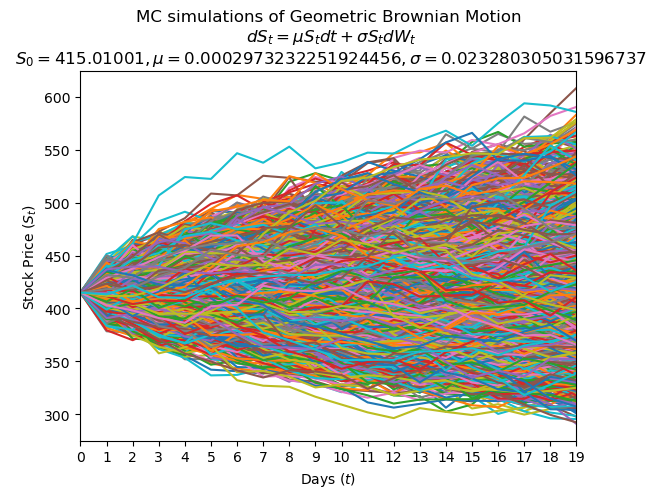

The Mean is 416.33509806542645


In [14]:
# Define time interval correctly 
time = np.linspace(0,T,step+1)
# Require numpy array that is the same shape as St
tt = np.full(shape=(simulation_number,step+1), fill_value=time).T
plt.plot(tt, St_mu)
plt.xlabel("Days $(t)$")
plt.ylabel("Stock Price $(S_t)$")
plt.title(
    "MC simulations of Geometric Brownian Motion\n $dS_t = \mu S_t dt + \sigma S_t dW_t$\n $S_0 = {0}, \mu = {1}, \sigma = {2}$".format(S0, drift_mu, volatility)
)
plt.xlim([0,19])
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8 , 9, 10 , 11, 12, 13, 14, 15, 16, 17, 18, 19])
plt.show()
print('The Mean is ' + str(np.mean(St_mu)))

In [15]:
# Create empty list to store the last prices of each simulation
last_St_mu = St_mu[-1]
last_Stmu_list = np.array(last_St_mu).tolist()

dif_prices_mu = [prices - 415.01001 for prices in last_Stmu_list] # list of prices when subtracting 415
Payoff_Callsmu = [] # Empty list for payoff calls
Payoff_Putsmu = [] # Empty list for payoff puts

# payoff list loop
for elem in dif_prices: 
    if elem <= 0:
        Payoff_Callsmu.append(0)
        Payoff_Putsmu.append(abs(elem))
    else:
        Payoff_Callsmu.append(elem)
        Payoff_Putsmu.append(0)

# Zip the two lists together to make one dataframe where payoff values are together
zipped = list(zip(Payoff_Callsmu, Payoff_Putsmu))
df_Payoff_mu = pd.DataFrame(zipped, columns=['Payoff Calls mu', 'Payoff Puts mu'])
df_Payoff_mu

# Getting number of nonzeros in each column
df_Payoff_mu.astype(bool).sum(axis=0)

# Take the payoff dataframe and create one with new column names
df_price_options_mu = df_Payoff_mu
df_price_options_mu.columns = ['Price Call mu', 'Price Put mu']

# Apply formula to both columns
Call_muu = df_price_options_mu['Price Call mu'].mean() * np.exp((-meanlog) * 19)
Put_muu = df_price_options_mu['Price Put mu'].mean() * np.exp((-meanlog) * 19)
print(Call_muu, Put_muu)

17.469769171685574 16.112955826395183


## Question 7

In [16]:
# Defining some key calculation for following questions using real world P
ln_div = (np.mean(last_St_list)) / Szero
dsc_mu = math.exp(-meanlog*19)
sig_T = stdlog * np.sqrt(19)
mu_sig = meanlog + 0.5*(stdlog ** 2)
d1_seven = (math.log(ln_div) + (mu_sig)*19) / sig_T
Call_seven = Call_p * dsc_mu * norm.cdf(d1_seven)
Put_seven = Put_p * dsc_mu * norm.cdf((-d1_seven))

print(Call_p, Put_p, Call_seven, Put_seven)

17.529043743587106 16.16762675817978 9.676919832440385 7.1512023293228895


## Question 8

In [17]:
dsc_rf = math.exp(-dailyrf*19)
sig_T_rf = stdlog * np.sqrt(19)
rf_sig = dailyrf + 0.5*(stdlog ** 2)


# Black-Scholes model using dailyrf and St=K 
S_t = Szero
K = Szero
bs_ln = math.log(S_t / K)
bs_d1 = (bs_ln + rf_sig * 19) / sig_T_rf
bs_d2 = bs_d1 - sig_T_rf
BS_call_price_rf = S_t * norm.cdf(bs_d1) - K * dsc_rf * norm.cdf(bs_d2)
BS_put_price_rf = -S_t * norm.cdf(-bs_d1) + K * dsc_rf * norm.cdf(-bs_d2)
print(BS_call_price_rf)
print(BS_put_price_rf)

17.247772518450034
16.31012024043821


## Question 9

In [18]:
# copy pasting Q6 and Q8 but increasing the annual volatility by 10% 
# increase std
stdlog_new = np.std(dlog) + (0.1/np.sqrt(252))
print(stdlog, stdlog_new)

0.023280305031596737 0.029579712915083857


In [19]:


# We re run the scenario analysis as in question 5 but now with the new volatility that increased volatility labeled as stdlog_new
# Parameters
# drift coefficent
drift_rf = dailyrf
# number of steps
step = 19
# number of sims
simulation_number = 10000
# initial stock price
S0 = Szero
# volatility
volatility_incr = stdlog_new
# calc each time step
dt = 1
# simulation using numpy arrays
St_rf_incr = np.exp(
    (drift_rf - volatility_incr ** 2 / 2) * dt
    + volatility * random_gbm
)
# include array of 1's
St_rf_incr = np.vstack([np.ones(simulation_number), St_rf_incr])
# multiply through by S0 and return the cumulative product of elements along a given simulation path (axis=0). 
St_rf_incr = S0 * St_rf_incr.cumprod(axis=0)
# Define time interval correctly 
time = np.linspace(0,T,step+1)
# Require numpy array that is the same shape as St
tt = np.full(shape=(simulation_number,step+1), fill_value=time).T
plt.plot(tt, St_rf_incr)
plt.xlabel("Days $(t)$")
plt.ylabel("Stock Price $(S_t)$")
plt.title(
    "MC simulations of Geometric Brownian Motion\n $dS_t = \rf S_t dt + \volatility S_t dW_t$\n $S_0 = {0}, \rf = {1}, \volatility = {2}$".format(S0, drift_mu, volatility_incr)
)
plt.xlim([0,19])
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8 , 9, 10 , 11, 12, 13, 14, 15, 16, 17, 18, 19])
plt.show()
print('The Mean is ' + str(np.mean(St_rf_incr)))

ValueError: 
 $dS_t = f S_t dt + olatility S_t dW_t$
 ^
Expected end of text, found '$'  (at char 1), (line:1, col:2)

<Figure size 640x480 with 1 Axes>

The Mean is 414.9728594208499


In [20]:
# Each scenario payoffs are drawn than average is taken and discounted.
# setting up the real world payoffs with increased volatility
# Create empty list to store the last prices of each simulation
last_St_rf_incr = St_rf_incr[-1]
last_Strf_list_incr = np.array(last_St_rf_incr).tolist()

dif_prices_rf_incr = [prices - 415.01001 for prices in last_Strf_list_incr] # list of prices when subtracting 415
Payoff_Callsrf_incr = [] # Empty list for payoff calls
Payoff_Putsrf_incr = [] # Empty list for payoff puts

# payoff list loop
for elem in dif_prices_rf_incr: 
    if elem <= 0:
        Payoff_Callsrf_incr.append(0)
        Payoff_Putsrf_incr.append(abs(elem))
    else:
        Payoff_Callsrf_incr.append(elem)
        Payoff_Putsrf_incr.append(0)

# Zip the two lists together to make one dataframe where payoff values are together
zipped = list(zip(Payoff_Callsrf_incr, Payoff_Putsrf_incr))
df_Payoff_rf_incr = pd.DataFrame(zipped, columns=['Payoff Calls rf_incr', 'Payoff Puts rf_incr'])
df_Payoff_rf_incr

# Getting number of nonzeros in each column
df_Payoff_rf_incr.astype(bool).sum(axis=0)

# Take the payoff dataframe and create one with new column names
df_price_options_rf_incr = df_Payoff_rf_incr
df_price_options_rf_incr.columns = ['Price Call rf_incr', 'Price Put rf_incr']

# Apply formula to both columns gives us the prices for this scenario analysis under risk neutral prob.
Call_rff_incr = df_price_options_rf_incr['Price Call rf_incr'].mean() * np.exp((-dailyrf) * 19)
Put_rff_incr = df_price_options_rf_incr['Price Put rf_incr'].mean() * np.exp((-dailyrf) * 19)
print(Call_rff_incr, Put_rff_incr)

16.831969481441593 16.78264878100056


In [21]:
# Extra the number of Calls and puts in total per 10000 scenarios 
# Getting number of nonzeros in each column
df_Payoff_rf_incr.astype(bool).sum(axis=0)

Price Call rf_incr    4837
Price Put rf_incr     5163
dtype: int64

In [22]:
# We re run the black scholes with the new volatility
dsc_rf = math.exp(-dailyrf*19)
sig_T_rf_incr = stdlog_new * np.sqrt(19)
rf_sig_incr = dailyrf + 0.5*(stdlog_new ** 2)


# Black-Scholes model using dailyrf and St=K together with new volatility
S_t = Szero
K = Szero
bs_ln_incr = math.log(S_t / K)
bs_d1_incr = (bs_ln_incr + rf_sig_incr * 19) / sig_T_rf_incr
bs_d2_incr = bs_d1_incr - sig_T_rf_incr
BS_call_price_rf_incr = S_t * norm.cdf(bs_d1_incr) - K * dsc_rf * norm.cdf(bs_d2_incr)
BS_put_price_rf_incr = -S_t * norm.cdf(-bs_d1_incr) + K * dsc_rf * norm.cdf(-bs_d2_incr)
print(BS_call_price_rf_incr)
print(BS_put_price_rf_incr)

21.78034934127291
20.842697063261085


## Question 10

In [23]:
# Scenario analysis
print('Q5 call price is ' + str(Call_p))
print('Q5 put price is ' + str(Put_p))
print('Q9 scenario call price is ' + str(Call_preal_incr))
print('Q9 scenario put price is ' + str(Put_preal_incr))

Q5 call price is 17.529043743587106
Q5 put price is 16.16762675817978


NameError: name 'Call_preal_incr' is not defined

In [ ]:
# BS analysis
print('Old BS call price is ' + str(BS_call_price))
print('Old BS Put price is ' + str(BS_put_price))
print('New BS call price is ' + str(BS_call_price_incr))
print('New BS put price is ' + str(BS_put_price_incr))

In [ ]:
# Vega = St*sqrt(T)* N'(d1) with N'(d1)=1/sqrt(2pi) *exp(-d1^2/2)
T_years = 19/252
T_days = 19
sqrt_T = np.sqrt(T_years)
sqrt_T_days = np.sqrt(T_days)
dev_N_d1 = (1/np.sqrt(2*math.pi)) * np.exp(0.5*((-bs_d1_incr) ** 2)) 
Vega = S_t * sqrt_T * dev_N_d1
Vega_days = S_t * sqrt_T_days * dev_N_d1
print('A 1% increase in the implied volatility increase the value of the option by ' + str(Vega/100))
print('A 1% increase in the implied volatility increase the value of the option by (T in days) ' + str(Vega_days/100))

## Question 11

In [ ]:
# one scenario using BS prices
# Black-Scholes model using mu and St=K 
S_t_put = 360.14
K_put = Szero
stdlog_put = stdlog + 0.0124
dsc_mu_put = math.exp(-meanlog*19)
sig_T_put = stdlog_put * np.sqrt(19)
mu_sig_put = meanlog + 0.5*(stdlog_put ** 2)
bs_ln_put = math.log(S_t_put / K_put)
bs_d1_put = (bs_ln_put + mu_sig_put * 19) / sig_T_put
bs_d2_put = bs_d1_put - sig_T_put
BS_put_price_eleven = -S_t * norm.cdf(-bs_d1_put) + K * dsc_mu * norm.cdf(-bs_d2_put)
print(BS_put_price)
print(BS_put_price_eleven)
print('The new volatility is ' + str(stdlog_put) + ' instead of ' + str(stdlog))

In [ ]:
vol_diff = (stdlog_put - stdlog) / stdlog
vol_diff_hun = vol_diff * 100
approx_change_vol = round(vol_diff_hun,2)
print('The change in volatility is ' + str(approx_change_vol) + ' %')

## Question 11 bis

In [ ]:
# Pnew-Pold = Vega*(newsigma - oldsigma)
# plug new volatility in BS 
diff_S_t = abs(S_t_put - Szero)
diffP_vega = diff_S_t / Vega
newsigma = diffP_vega + stdlog
print(newsigma)

In [ ]:
# BS vega check
stdlog_put_check = newsigma
sig_T_put_check = stdlog_put_check * np.sqrt(19)
mu_sig_put_check = meanlog + 0.5*(stdlog_put_check ** 2)
bs_ln_put_check = math.log(S_t_put / K_put)
bs_d1_put_check = (bs_ln_put_check + mu_sig_put_check * 19) / sig_T_put_check
bs_d2_put_check = bs_d1_put_check - sig_T_put_check
BS_put_price_eleven_check = -S_t_put * norm.cdf(-bs_d1_put_check) + K * dsc_mu * norm.cdf(-bs_d2_put_check)
print(BS_put_price_eleven_check)